In [1]:
import pandas as pd

In [3]:
data =   pd.read_csv('test.csv')
data.head()
data.shape

(5200, 4)

In [4]:
import numpy as np
data['label'] = np.random.randint(0,2,data.shape[0])

In [5]:
data.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,0


In [6]:
X = data.drop('label',axis = 1)
y = data['label']

In [7]:
X.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [8]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5195    1
5196    1
5197    0
5198    1
5199    0
Name: label, Length: 5200, dtype: int32

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
data = data.dropna()

In [10]:
data.shape

(4575, 5)

In [20]:
messages = data.copy()
messages.reset_index(inplace=True)
messages.head()

,index,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,0
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [21]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for  word in review if word not in stopwords.words("english")]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
cv= CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [31]:
y = messages['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [32]:
cv.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abba', 'abbi', 'abbi martin',
       'abbi martin expos', 'abc', 'abe', 'abedin', 'abedin email',
       'abolish', 'abort', 'abram', 'abroad', 'abroad new',
       'abroad new york', 'absolut', 'abus', 'academi', 'accept'],
      dtype=object)

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [37]:
count_df.head(1)

,aaron,abandon,abba,abbi,abbi martin,abbi martin expos,abc,abe,abedin,abedin email,...,zero,zika,zika new,zika new york,zika viru,zimbabw,zone,zone new,zone new york,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
import itertools
from sklearn import metrics
import numpy as np

accuracy :  0.509
Confusion matrix, without normalization


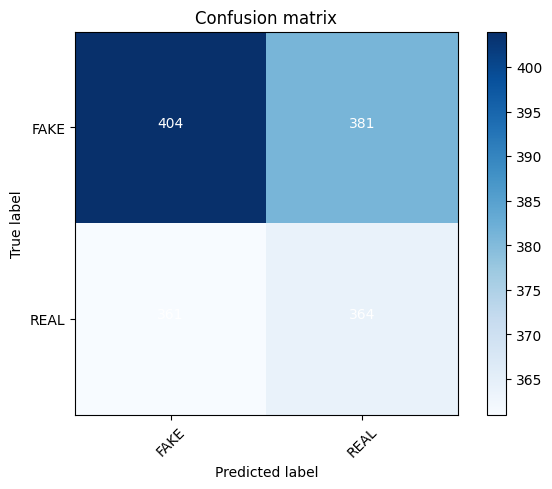

In [43]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy :  %0.3f"  %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["FAKE","REAL"])

### Passive agressive classifier

accuracy :  0.501
Confusion matrix, without normalization


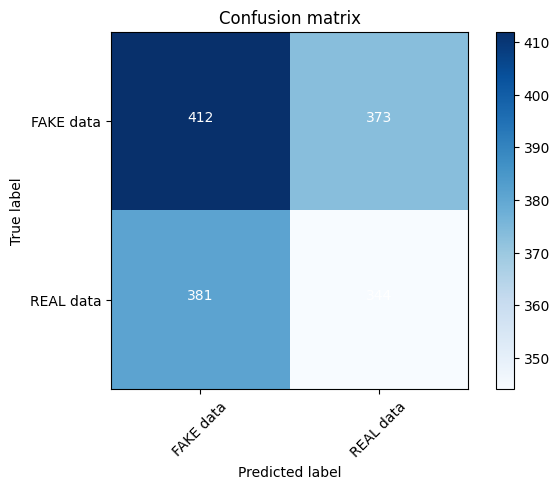

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
lin_clf  = PassiveAggressiveClassifier(n_iter_no_change=50)
lin_clf.fit(X_train,y_train)
pred = lin_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy :  %0.3f"  %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["FAKE data","REAL data"])

### Multinomial Classifier with hyperparameter

In [47]:
classifier = MultinomialNB(alpha=0.1)


In [50]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha= alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print(f"Alpha : {alpha}   score : {score}")

c:\AI_ML_fresh\.venv\Lib\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\AI_ML_fresh\.venv\Lib\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha : 0.0   score : 0.5198675496688742
Alpha : 0.1   score : 0.5039735099337749
Alpha : 0.2   score : 0.5013245033112583
Alpha : 0.30000000000000004   score : 0.5039735099337749
Alpha : 0.4   score : 0.5052980132450331
Alpha : 0.5   score : 0.5086092715231788
Alpha : 0.6000000000000001   score : 0.5125827814569537
Alpha : 0.7000000000000001   score : 0.509271523178808
Alpha : 0.8   score : 0.5086092715231788
Alpha : 0.9   score : 0.5086092715231788


In [51]:
feature_names = cv.get_feature_names_out()

In [54]:
classifier.feature_log_prob_[1]

array([ -8.56197043,  -8.33371178, -10.0283075 , ..., -10.0283075 ,
       -10.0283075 ,  -8.85823625], shape=(5000,))

In [55]:
# most real word
sorted(zip(classifier.feature_log_prob_[1],feature_names),reverse=True)[:20]

[(np.float64(-3.5112929330778186), 'new'),
 (np.float64(-3.577486076851393), 'time'),
 (np.float64(-3.605962818653288), 'york'),
 (np.float64(-3.605962818653288), 'new york'),
 (np.float64(-3.622344692103294), 'york time'),
 (np.float64(-3.622344692103294), 'new york time'),
 (np.float64(-4.2603337860742165), 'trump'),
 (np.float64(-4.595556369658603), 'breitbart'),
 (np.float64(-5.339000434155882), 'clinton'),
 (np.float64(-5.469763154702137), 'hillari'),
 (np.float64(-5.765627622308858), 'donald'),
 (np.float64(-5.781400819985952), 'elect'),
 (np.float64(-5.8137138089764955), 'donald trump'),
 (np.float64(-6.012925980934874), 'one'),
 (np.float64(-6.0749293082401135), 'say'),
 (np.float64(-6.096481866625847), 'report'),
 (np.float64(-6.141032663611221), 'obama'),
 (np.float64(-6.164075157758376), 'email'),
 (np.float64(-6.187661156764255), 'us'),
 (np.float64(-6.187661156764255), 'presid')]

In [56]:
# most fake words
sorted(zip(classifier.feature_log_prob_[1],feature_names))[:20]

[(np.float64(-10.028307499350174), 'abba'),
 (np.float64(-10.028307499350174), 'abbi'),
 (np.float64(-10.028307499350174), 'abbi martin'),
 (np.float64(-10.028307499350174), 'abbi martin expos'),
 (np.float64(-10.028307499350174), 'abedin email'),
 (np.float64(-10.028307499350174), 'access'),
 (np.float64(-10.028307499350174), 'access pipelin'),
 (np.float64(-10.028307499350174), 'addict'),
 (np.float64(-10.028307499350174), 'advertis'),
 (np.float64(-10.028307499350174), 'advis'),
 (np.float64(-10.028307499350174), 'affect'),
 (np.float64(-10.028307499350174), 'affleck'),
 (np.float64(-10.028307499350174), 'afraid'),
 (np.float64(-10.028307499350174), 'ahmad'),
 (np.float64(-10.028307499350174), 'ail'),
 (np.float64(-10.028307499350174), 'al qaeda'),
 (np.float64(-10.028307499350174), 'alreadi know'),
 (np.float64(-10.028307499350174), 'american peopl'),
 (np.float64(-10.028307499350174), 'ami'),
 (np.float64(-10.028307499350174), 'ami schumer')]

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0-rc0
GPUs Available: []


In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0-rc0
GPUs Available: []


In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices("GPU"))


TensorFlow version: 2.20.0-rc0
GPUs Available: []
